<img src="escuela-de-economia.png" width="260" height="60">
<center>
    <b>EC4301 MACROECONOMETRÍA</b><br>
    <b>Profesor:  Randall Romero Aguilar, PhD</b>
<br><br>
<b>Laboratorio:</b>
<div style="font-size:175%;color:white; background-color: #0064b0;">Tema 1: Introducción a series de tiempo</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Cálculo de transformaciones de la serie del PIB de Costa Rica</div> 
</center>
<i>Creado:     2020-Ene-16 
    <br>
    Actualizado: 2020-Ago-25</i>

## 

Este cuaderno genera figuras incluidas en **Handout-01--Introduccion.pdf**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [2]:
pib = pd.read_csv('data/CR-PIB.csv', index_col=0, parse_dates=True)
pib

,pib
periodo,
1991-01-01,2.252195
1991-04-01,2.146961
1991-07-01,2.168997
1991-10-01,2.371361
1992-01-01,2.451055
...,...
2018-07-01,6.984787
2018-10-01,7.219918
2019-01-01,7.322407


In [3]:
def figura(datos, titulo, y):
    fig, ax = plt.subplots(1,1, figsize=[8,3])
    datos.plot(ax=ax, title=titulo, ylabel=y, xlabel="", legend="")
    return ax

### Nivel de la serie

* Antes de modelar una serie de tiempo, es útil representarla con un gráfico para detectar algunas de sus propiedades.
* En este caso: el PIB
    -  muestra una tendencia positiva
    - tiene variaciones estacionarias
* En lo que sigue, nos referimos a esta serie en nivel como $y_t$.

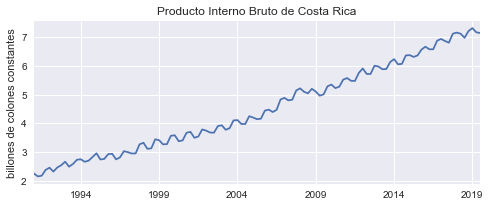

In [4]:
figura(pib, 'Producto Interno Bruto de Costa Rica', 'billones de colones constantes');

### Primera diferencia de la serie

\begin{equation*}
\Delta y_t \equiv y_t - y_{t-1}
\end{equation*}


* Esta transformación
    - elimina la tendencia de la serie,
    - mantiene las oscilaciones estacionales.


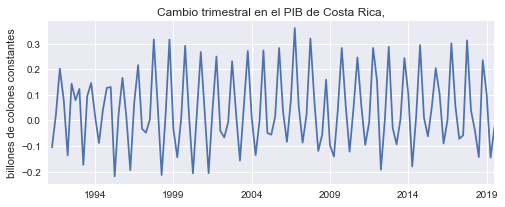

In [5]:
figura(pib.diff(1), 'Cambio trimestral en el PIB de Costa Rica,','billones de colones constantes');

### Tasa de crecimiento de la serie

\begin{equation*}
\Delta\% y_t \equiv \frac{y_t - y_{t-1}}{y_{t-1}} \times 100
\end{equation*}


* Elimina tendencia, mantiene estacionalidad.
* Limitación: asimetría con respecto a cambios positivos y negativos: Subir de 100 a 125 (aumento de 25\%), bajar de 125 a 100 (caída de “solo” 20\%).


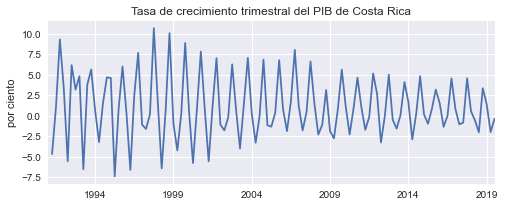

In [6]:
figura(100*pib.pct_change(1), 'Tasa de crecimiento trimestral del PIB de Costa Rica', 'por ciento');

### Tasa “continua” de crecimiento de la serie

\begin{equation*}
\Delta\% y_t \approx \left(\ln y_t - \ln y_{t-1}\right)\times 100
\end{equation*}

* Similar a la anterior porque $\ln(1+x)\approx x$ si $x$ es “pequeño”
* Ventaja: simetría con respecto a cambios positivos y negativos

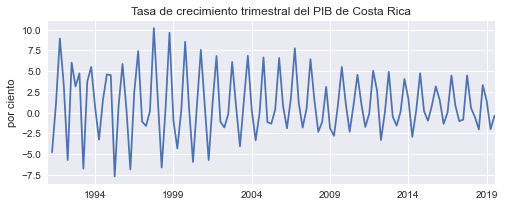

In [7]:
figura(100*np.log(pib).diff(), 'Tasa de crecimiento trimestral del PIB de Costa Rica', 'por ciento');

### Diferencia interanual de la serie
\begin{equation*}
\Delta_4 y_t \equiv y_t - y_{t-4}
\end{equation*}

* Elimina tanto la tendencia como el componente estacional
* Nótese la fuerte disminución del PIB durante la crisis de 2008.


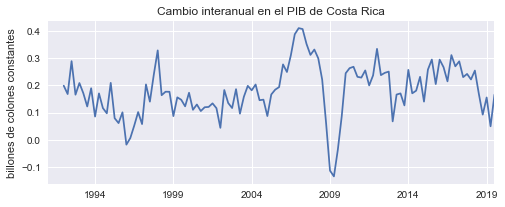

In [8]:
figura(pib.diff(4), 'Cambio interanual en el PIB de Costa Rica','billones de colones constantes');

### Tasa de crecimiento interanual

\begin{equation*}
\Delta_4\% y_t \approx \left(\ln y_t - \ln y_{t-4}\right)\times 100
\end{equation*}

* Equivalente a la suma de las tasas de crecimiento de los cuatro trimestres comprendidos en el año:
\begin{align*}
\Delta_4\% y_t &\approx \left(\ln y_t - \ln y_{t-4}\right)\times 100 \\
  &= \left(\ln y_{t} - \ln y_{t-1} + \ln y_{t-1} - \ln y_{t-2} + \ln y_{t-2} - \ln y_{t-3} + \ln y_{t-3} - \ln y_{t-4}\right)\times 100 \\
  &= \Delta\% y_{t} + \Delta\% y_{t-1} + \Delta\% y_{t-2} + \Delta\% y_{t-3}
\end{align*}


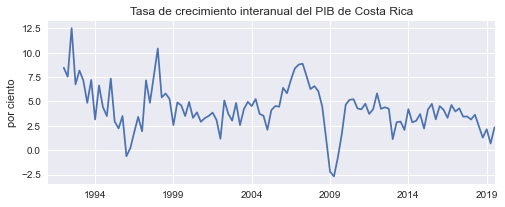

In [9]:
figura(100*np.log(pib).diff(4), 'Tasa de crecimiento interanual del PIB de Costa Rica', 'por ciento');

### Serie suavizada por media móvil
\begin{equation*}
y^s_t \equiv \tfrac{1}{4}\left(y_t + y_{t-1} + y_{t-2} + y_{t-3}\right)
\end{equation*}

* Elimina el componente estacional, pero manteniendo la tendencia
* Se observa un cambio estructural en 2008-2009.

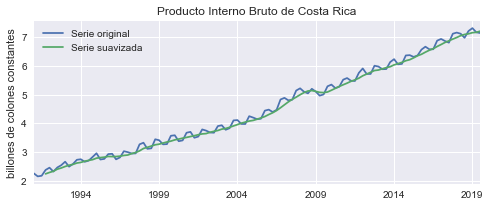

In [10]:
ax = figura(pib, 'Producto Interno Bruto de Costa Rica', 'billones de colones constantes')
pib.rolling(4).mean().plot(ax=ax, xlabel="")
ax.legend(['Serie original', 'Serie suavizada'])